In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
icu_days = pd.read_csv('MIMIC2csv/icustay_days.csv')
re_ind = icu_days.set_index(['icustay_id','subject_id'])
icu_subject = list(re_ind.index)

In [53]:
def removeDuplicates(lst):
      
    return list(set([i for i in lst]))

### Target column 

In [54]:
icu_subject = removeDuplicates(icu_subject)

target_ICUstay = pd.DataFrame()
for i in range(0,len(icu_subject)):
    x = (re_ind.loc[icu_subject[i]]) 
    target_ICUstay = target_ICUstay.append(x[(x.seq == x.seq.max())])
    
target_ICUstay = target_ICUstay.drop(labels= ['begintime','endtime','first_day_flg','last_day_flg'],axis=1)
#target_ICUstay.head()

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packag

### **Feature 1.** Number of Chart items 

In [55]:
chart_dur = pd.read_csv('MIMIC2csv/a_chartdurations.csv')

chart_dur = chart_dur[chart_dur.icustay_id.notna()]
chart_dur.icustay_id = chart_dur.icustay_id.astype(np.int64)

re_ind_chart_dur = chart_dur.set_index(['icustay_id','subject_id'])
chart_subject = list(re_ind_chart_dur.index)
chart_subject = removeDuplicates(chart_subject)

no_chart_feature = pd.DataFrame(columns = ['icustay_id','subject_id','no_chart_items'])

for i in range(0,len(chart_subject)):
    no_chart_feature = no_chart_feature.append({'icustay_id': chart_subject[i][0], 'subject_id': chart_subject[i][1], 'no_chart_items': len(re_ind_chart_dur.loc[chart_subject[i]])}, ignore_index=True)
    
no_chart_feature = no_chart_feature.set_index(['icustay_id','subject_id'])

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  del sys.path[0]


### **Feature 2.** IO duration

In [56]:
io_dur = pd.read_csv('MIMIC2csv/a_iodurations.csv')

io_dur = io_dur[io_dur.icustay_id.notna()]
io_dur.icustay_id = io_dur.icustay_id.astype(np.int64)

re_ind_io_dur = io_dur.set_index(['icustay_id','subject_id'])

io_subject = list(re_ind_io_dur.index)
io_subject = removeDuplicates(io_subject)

io_dur_feature = pd.DataFrame(columns = ['icustay_id','subject_id','io_dur_min'])

for i in range(0,len(io_subject)):
    io_dur_feature = io_dur_feature.append({'icustay_id': io_subject[i][0], 'subject_id': io_subject[i][1], 'io_dur_min': re_ind_io_dur.loc[io_subject[i]].duration.sum()}, ignore_index=True)
    
io_dur_feature = io_dur_feature.astype(np.int64)

io_dur_feature = io_dur_feature.set_index(['icustay_id','subject_id'])

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  


### **Feature 3.** Medication duration

In [57]:
med_dur = pd.read_csv('MIMIC2csv/a_meddurations.csv')

med_dur = med_dur[med_dur.icustay_id.notna()]
med_dur.icustay_id = med_dur.icustay_id.astype(np.int64)

re_ind_med_dur = med_dur.set_index(['icustay_id','subject_id'])

med_subject = list(re_ind_med_dur.index)
med_subject = removeDuplicates(med_subject)

med_dur_feature = pd.DataFrame(columns = ['icustay_id','subject_id','med_dur_min'])

for i in range(0,len(med_subject)):
    med_dur_feature = med_dur_feature.append({'icustay_id': med_subject[i][0], 'subject_id': med_subject[i][1], 'med_dur_min': re_ind_med_dur.loc[med_subject[i]].duration.sum()}, ignore_index=True)
    
med_dur_feature = med_dur_feature.astype(np.int64)
med_dur_feature = med_dur_feature.set_index(['icustay_id','subject_id'])

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  


### **Feature 4.** Sum of medication volume

In [58]:
additives = pd.read_csv('MIMIC2csv/additives.csv')

additives = additives[additives.icustay_id.notna()]
additives.icustay_id = additives.icustay_id.astype(np.int64)

re_ind_additives = additives.set_index(['icustay_id','subject_id'])

additives_subject = list(re_ind_additives.index)
additives_subject = removeDuplicates(additives_subject)

add_dose_amt_feature = pd.DataFrame(columns = ['icustay_id','subject_id','total_amt'])

for i in range(0,len(additives_subject)):
    add_dose_amt_feature = add_dose_amt_feature.append({'icustay_id': additives_subject[i][0], 'subject_id': additives_subject[i][1], 'total_amt': re_ind_additives.loc[additives_subject[i]].amount.sum()}, ignore_index=True)
    
add_dose_amt_feature = add_dose_amt_feature.astype(np.int64)
add_dose_amt_feature = add_dose_amt_feature.set_index(['icustay_id','subject_id'])

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [59]:
demographic_det = pd.read_csv('MIMIC2csv/demographic_detail.csv')

demographic_det = demographic_det.drop_duplicates(subset='subject_id')

demographic_det = demographic_det.drop(['hadm_id','marital_status_itemid','ethnicity_itemid','overall_payor_group_itemid','religion_itemid','admission_type_itemid','admission_type_descr','admission_source_itemid','admission_source_descr'],axis=1)

In [60]:
drg_events = pd.read_csv('MIMIC2csv/drgevents.csv')

In [61]:
icu_stay_det = pd.read_csv('MIMIC2csv/icustay_detail.csv')

icu_stay_det = icu_stay_det.drop(['dob','dod','icustay_seq','expire_flg','subject_icustay_total_num','subject_icustay_seq','hospital_total_num','hospital_seq','hospital_first_flg','hospital_last_flg','hospital_admit_dt','hospital_disch_dt','hospital_los','icustay_age_group','hospital_expire_flg','icustay_total_num','icustay_first_flg','icustay_last_flg','icustay_los','icustay_intime','icustay_outtime','icustay_expire_flg','icustay_last_careunit','icustay_first_service','icustay_last_service','weight_min','weight_max','sapsi_min','sapsi_max','sofa_min','sofa_max','matched_waveforms_num'],axis=1)

### **Feature 5.** NLTK diagnosis feature

In [62]:
icd9 = pd.read_csv('MIMIC2csv/icd9.csv')

re_ind_icd9 = icd9.set_index(['subject_id','hadm_id'])
re_ind_icd9 = re_ind_icd9.drop('code',axis=1)

re_ind_icd9.head()

# World Health Organization's Ninth Revision, International Classification 
# of Diseases (ICD-9).

sequence  \
subject_id hadm_id             
56         28766           1   
           28766           2   
           28766           3   
           28766           4   
           28766           5   

                                                          description  
subject_id hadm_id                                                     
56         28766    SECONDARY MALIGNANT NEOPLASM OF BRAIN AND SPIN...  
           28766    MALIGNANT NEOPLASM OF OTHER PARTS OF BRONCHUS ...  
           28766    CHRONIC OR UNSPECIFIED GASTRIC ULCER WITH HEMO...  
           28766                    HYPOSMOLALITY AND/OR HYPONATREMIA  
           28766                 CONGESTIVE HEART FAILURE UNSPECIFIED

In [63]:
icd9_subject = list(re_ind_icd9.index)
icd9_subject = removeDuplicates(icd9_subject)

In [64]:
%%time
icd9_diag = pd.DataFrame(columns = ['subject_id','hadm_id','diagnosis'])
for i in range(0,len(icd9_subject)):
    sample = (re_ind_icd9.loc[icd9_subject[i]]).reset_index()
    diagnosis = []
    for j in range(0,len(sample)):
        if type(sample.loc[j].description) == str:
            y = sample.loc[j].description.lower().split()
            diagnosis = diagnosis + y
    icd9_diag = icd9_diag.append({'subject_id':icd9_subject[i][0], 'hadm_id': icd9_subject[i][1],'diagnosis':diagnosis},ignore_index=True)

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until


CPU times: user 49.5 s, sys: 252 ms, total: 49.8 s
Wall time: 50.2 s


In [65]:
icd9_diag

,subject_id,hadm_id,diagnosis
0,7880,28462,"[closed, fracture, of, vault, of, skull, with,..."
1,8790,27956,"[unspecified, septicemia, acute, respiratory, ..."
2,871,2485,"[unspecified, septicemia, calculus, of, gallbl..."
3,5506,12998,"[embolism, and, thrombosis, of, other, specifi..."
4,26482,22924,"[other, closed, fractures, of, upper, end, of,..."
...,...,...,...
5056,11764,14694,"[respiratory, failure, obstructive, chronic, b..."
5057,28140,34397,"[cerebral, embolism, with, cerebral, infarctio..."
5058,13686,4924,"[other, specified, gastritis, with, hemorrhage..."
5059,8617,33459,"[atrial, fibrillation, congestive, heart, fail..."


In [66]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/madihahhaque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
full_list = []  # list containing all words of all texts
for elmnt in icd9_diag['diagnosis']:  # loop over lists in df
    full_list += elmnt  # append elements of lists to full list

val_counts = pd.Series(full_list).value_counts()  # make temporary Series to count['Text']:  # loop over lists in df
full_list += elmnt  # append elements of lists to full list
    
stop_words = stopwords.words('english')
stop_words.append('without')
stop_words.append('due')
stop_words.append('specified')
stop_words.append('unspecified')
stop_words.append('essential')
stop_words.append('nos')
stop_words.append('native')
stop_words.append('elsewhere')
stop_words.append('type')

filtered = [w for w in full_list if not w.lower() in stop_words]
    
allWordDist = nltk.FreqDist(w.lower() for w in filtered)
mostCommon= allWordDist.most_common(20)
    
commonWords = [] 
for i in range(0,len(mostCommon)):
    commonWords.append(mostCommon[i][0])

In [68]:
def diagWordCount(x):
    wordcount = 0
    lst = []
    for word in x:
        if word in commonWords:
            wordcount += 1
    lst.append(wordcount)
    return lst

In [69]:
diagnosis_countList = icd9_diag.diagnosis.map(diagWordCount)

In [70]:
for i in range(0,len(diagnosis_countList)):
    diagnosis_countList[i] = diagnosis_countList[i][0]

In [71]:
diagnosis_countList

0        1
1       16
2        9
3       15
4        1
        ..
5056     9
5057    13
5058    10
5059    11
5060     0
Name: diagnosis, Length: 5061, dtype: object

In [72]:
icd9_diag['diagnosis_count'] = diagnosis_countList

In [73]:
icd9_diag.diagnosis_count = icd9_diag.diagnosis_count.astype(np.int64)
icd9_diag.subject_id = icd9_diag.subject_id.astype(np.int64)
icd9_diag.hadm_id = icd9_diag.hadm_id.astype(np.int64)
icd9_diag = icd9_diag.drop('diagnosis',axis=1)

In [74]:
icd9_diag.dtypes

subject_id         int64
hadm_id            int64
diagnosis_count    int64
dtype: object

In [75]:
icd9_diag

,subject_id,hadm_id,diagnosis_count
0,7880,28462,1
1,8790,27956,16
2,871,2485,9
3,5506,12998,15
4,26482,22924,1
...,...,...,...
5056,11764,14694,9
5057,28140,34397,13
5058,13686,4924,10
5059,8617,33459,11


# ***MERGE*** (final_df_1.csv)

In [76]:
print('shape of icu details:',icu_stay_det.shape)
print('shape of target df:',target_ICUstay.shape)

shape of icu details: (5844, 10)
shape of target df: (5844, 1)


In [77]:
merge_target_detail = pd.merge(icu_stay_det,target_ICUstay,left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])
merge_target_detail_drg = pd.merge(merge_target_detail,drg_events,how='left',left_on ='hadm_id',right_on = 'hadm_id')
merge_target_detail_drg_demo = pd.merge(merge_target_detail_drg,demographic_det,how ='left',left_on='subject_id_x',right_on= 'subject_id')
merge_target_detail_drg_demo_med = pd.merge(merge_target_detail_drg_demo,med_dur_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])
merge_target_detail_drg_demo_med_dose = pd.merge(merge_target_detail_drg_demo_med,add_dose_amt_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])
merge_target_detail_drg_demo_med_dose_io = pd.merge(merge_target_detail_drg_demo_med_dose,io_dur_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])

final_df = pd.merge(merge_target_detail_drg_demo_med_dose_io,no_chart_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])

### Data visuals for features

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='height'>

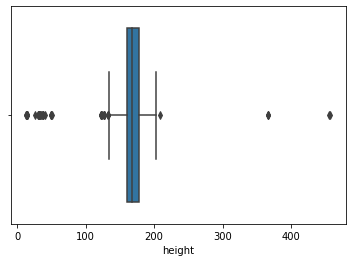

In [21]:
sns.boxplot(final_df.height)

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='icustay_admit_age'>

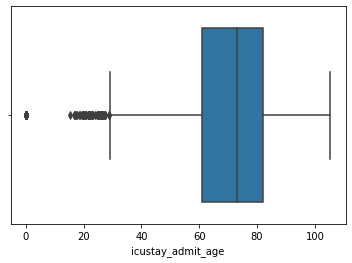

In [22]:
sns.boxplot(final_df.icustay_admit_age)

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='weight_first'>

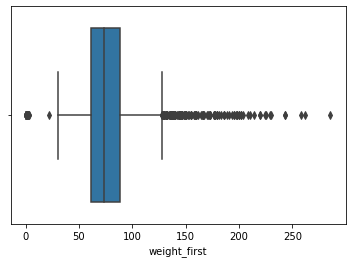

In [23]:
sns.boxplot(final_df.weight_first)

In [24]:
final_df = final_df[final_df.height!=final_df.height.max()]
final_df = final_df[final_df.weight_first!=final_df.weight_first.max()]
final_df = final_df[final_df.icustay_admit_age!=final_df.icustay_admit_age.min()]

final_df = final_df.drop(['subject_id','icustay_id','subject_id_x','hadm_id','subject_id_y','itemid','no_chart_items'],axis=1)

In [25]:
final_df

,gender,icustay_admit_age,icustay_first_careunit,height,weight_first,sapsi_first,sofa_first,seq,cost_weight,marital_status_descr,ethnicity_descr,overall_payor_group_descr,religion_descr,med_dur_min,total_amt,io_dur_min
0,F,90.64270,CCU,NaN,49.2,17.0,5.0,2,1.22,NaN,WHITE,MEDICARE-PRIVATE,NOT SPECIFIED,NaN,70.0,NaN
1,M,68.93134,MICU,NaN,NaN,11.0,2.0,2,1.62,MARRIED,WHITE,MEDICARE-PRIVATE,JEWISH,NaN,NaN,3726.0
2,M,48.62681,MICU,NaN,72.4,14.0,4.0,2,0.82,SEPARATED,BLACK/AFRICAN AMERICAN,MEDICARE,NOT SPECIFIED,2125.0,NaN,6165.0
3,M,73.48396,FICU,165.10,65.0,NaN,5.0,1,NaN,SINGLE,WHITE,MEDICARE,JEWISH,160.0,20.0,1386.0
4,M,76.52892,MICU,179.07,96.8,28.0,14.0,7,1.62,MARRIED,WHITE,MEDICARE,CATHOLIC,59145.0,28714.0,87496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,M,88.09742,SICU,NaN,50.0,16.0,10.0,3,1.16,NaN,WHITE,MEDICARE,OTHER,NaN,600.0,NaN
5840,M,57.78417,CSRU,182.88,77.5,17.0,13.0,10,5.75,SEPARATED,BLACK/AFRICAN AMERICAN,MEDICAID,NOT SPECIFIED,NaN,3066.0,NaN
5841,M,89.24603,CCU,NaN,54.4,18.0,12.0,12,1.57,MARRIED,WHITE,MEDICARE,JEWISH,NaN,28760.0,NaN
5842,M,68.48606,CSRU,NaN,76.6,17.0,8.0,27,5.12,MARRIED,WHITE,PRIVATE,UNOBTAINABLE,NaN,3750.0,NaN


In [26]:
final_df = final_df.reset_index(drop=True)

In [27]:
final_df.dtypes

gender                        object
icustay_admit_age            float64
icustay_first_careunit        object
height                       float64
weight_first                 float64
sapsi_first                  float64
sofa_first                   float64
seq                            int64
cost_weight                  float64
marital_status_descr          object
ethnicity_descr               object
overall_payor_group_descr     object
religion_descr                object
med_dur_min                  float64
total_amt                    float64
io_dur_min                   float64
dtype: object

In [30]:
final_df

,gender,icustay_admit_age,icustay_first_careunit,height,weight_first,sapsi_first,sofa_first,seq,cost_weight,marital_status_descr,ethnicity_descr,overall_payor_group_descr,religion_descr,med_dur_min,total_amt,io_dur_min
0,F,90.64270,CCU,NaN,49.2,17.0,5.0,2,1.22,nan,WHITE,MEDICARE-PRIVATE,NOT SPECIFIED,NaN,70.0,NaN
1,M,68.93134,MICU,NaN,NaN,11.0,2.0,2,1.62,MARRIED,WHITE,MEDICARE-PRIVATE,JEWISH,NaN,NaN,3726.0
2,M,48.62681,MICU,NaN,72.4,14.0,4.0,2,0.82,SEPARATED,BLACK/AFRICAN AMERICAN,MEDICARE,NOT SPECIFIED,2125.0,NaN,6165.0
3,M,73.48396,FICU,165.10,65.0,NaN,5.0,1,NaN,SINGLE,WHITE,MEDICARE,JEWISH,160.0,20.0,1386.0
4,M,76.52892,MICU,179.07,96.8,28.0,14.0,7,1.62,MARRIED,WHITE,MEDICARE,CATHOLIC,59145.0,28714.0,87496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,M,88.09742,SICU,NaN,50.0,16.0,10.0,3,1.16,nan,WHITE,MEDICARE,OTHER,NaN,600.0,NaN
5812,M,57.78417,CSRU,182.88,77.5,17.0,13.0,10,5.75,SEPARATED,BLACK/AFRICAN AMERICAN,MEDICAID,NOT SPECIFIED,NaN,3066.0,NaN
5813,M,89.24603,CCU,NaN,54.4,18.0,12.0,12,1.57,MARRIED,WHITE,MEDICARE,JEWISH,NaN,28760.0,NaN
5814,M,68.48606,CSRU,NaN,76.6,17.0,8.0,27,5.12,MARRIED,WHITE,PRIVATE,UNOBTAINABLE,NaN,3750.0,NaN


In [31]:
final_df.describe()

,icustay_admit_age,height,weight_first,sapsi_first,sofa_first,seq,cost_weight,med_dur_min,total_amt,io_dur_min
count,5816.000000,2182.000000,4783.000000,4716.000000,5286.000000,5816.000000,5352.000000,2.040000e+03,4248.000000,2.832000e+03
mean,70.515900,168.002722,77.428750,15.391009,6.474650,5.930365,3.401932,1.596732e+05,7666.361347,1.162340e+05
std,15.471679,17.267442,23.740483,5.513677,4.203348,8.875898,3.905359,1.539316e+06,13818.316415,5.736873e+05
min,0.005710,12.700000,21.700000,1.000000,0.000000,1.000000,0.270000,0.000000e+00,1.000000,0.000000e+00
25%,61.140660,160.020000,62.000000,11.000000,3.000000,2.000000,1.270000,2.370000e+03,161.750000,7.551000e+03
50%,73.249930,167.640000,73.600000,15.000000,6.000000,3.000000,1.970000,7.536000e+03,860.000000,2.144950e+04
75%,82.280232,177.800000,88.300000,19.000000,9.000000,6.000000,3.730000,2.905250e+04,5811.000000,6.523700e+04
max,105.342550,454.660000,262.000000,38.000000,24.000000,174.000000,20.040000,4.034197e+07,138713.000000,1.324625e+07


In [214]:
final_df.corr()

,icustay_admit_age,height,weight_first,sapsi_first,sofa_first,seq,cost_weight,med_dur_min,total_amt,io_dur_min
icustay_admit_age,1.000000,-0.098348,-0.218889,0.145554,-0.063373,-0.046807,-0.036917,-0.018456,0.054526,-0.018132
height,-0.098348,1.000000,0.252148,-0.032993,0.018379,0.014455,0.011513,0.050615,0.041645,0.055673
weight_first,-0.218889,0.252148,1.000000,-0.059690,0.081483,0.052616,0.035289,0.051530,0.082211,0.080067
sapsi_first,0.145554,-0.032993,-0.059690,1.000000,0.694081,0.159437,0.195584,0.017808,0.052700,0.093177
sofa_first,-0.063373,0.018379,0.081483,0.694081,1.000000,0.219212,0.210269,0.060323,0.085132,0.133756
seq,-0.046807,0.014455,0.052616,0.159437,0.219212,1.000000,0.531684,0.197501,0.318755,0.426150
cost_weight,-0.036917,0.011513,0.035289,0.195584,0.210269,0.531684,1.000000,0.133432,0.237562,0.234992
med_dur_min,-0.018456,0.050615,0.051530,0.017808,0.060323,0.197501,0.133432,1.000000,0.138264,0.690310
total_amt,0.054526,0.041645,0.082211,0.052700,0.085132,0.318755,0.237562,0.138264,1.000000,0.147780
io_dur_min,-0.018132,0.055673,0.080067,0.093177,0.133756,0.426150,0.234992,0.690310,0.147780,1.000000


# ***Merge*** final_df_2

In [78]:
merge_target_detail = pd.merge(icu_stay_det,target_ICUstay,left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])
merge_target_detail_drg = pd.merge(merge_target_detail,drg_events,how='left',left_on ='hadm_id',right_on = 'hadm_id')
merge_target_detail_drg_demo = pd.merge(merge_target_detail_drg,demographic_det,how ='left',left_on='subject_id_x',right_on= 'subject_id')
merge_target_detail_drg_demo_med = pd.merge(merge_target_detail_drg_demo,med_dur_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])
merge_target_detail_drg_demo_med_dose = pd.merge(merge_target_detail_drg_demo_med,add_dose_amt_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])
merge_target_detail_drg_demo_med_dose_io = pd.merge(merge_target_detail_drg_demo_med_dose,io_dur_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])

final_df = pd.merge(merge_target_detail_drg_demo_med_dose_io,no_chart_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])

In [79]:
final_df.shape

(5844, 23)

In [80]:
icd9_diag.shape

(5061, 3)

In [81]:
final_df_2 = pd.merge(final_df,icd9_diag,how='left',left_on = ['subject_id','hadm_id'],right_on = ['subject_id','hadm_id'])

In [82]:
final_df_2

,icustay_id,subject_id_x,gender,hadm_id,icustay_admit_age,icustay_first_careunit,height,weight_first,sapsi_first,sofa_first,...,subject_id,marital_status_descr,ethnicity_descr,overall_payor_group_descr,religion_descr,med_dur_min,total_amt,io_dur_min,no_chart_items,diagnosis_count
0,62,56,F,28766.0,90.64270,CCU,NaN,49.2,17.0,5.0,...,56.0,NaN,WHITE,MEDICARE-PRIVATE,NOT SPECIFIED,NaN,70.0,NaN,NaN,9.0
1,41,37,M,18052.0,68.93134,MICU,NaN,NaN,11.0,2.0,...,37.0,MARRIED,WHITE,MEDICARE-PRIVATE,JEWISH,NaN,NaN,3726.0,NaN,12.0
2,89,78,M,15161.0,48.62681,MICU,NaN,72.4,14.0,4.0,...,78.0,SEPARATED,BLACK/AFRICAN AMERICAN,MEDICARE,NOT SPECIFIED,2125.0,NaN,6165.0,NaN,2.0
3,76,67,M,NaN,73.48396,FICU,165.10,65.0,NaN,5.0,...,67.0,SINGLE,WHITE,MEDICARE,JEWISH,160.0,20.0,1386.0,NaN,NaN
4,4,3,M,2075.0,76.52892,MICU,179.07,96.8,28.0,14.0,...,3.0,MARRIED,WHITE,MEDICARE,CATHOLIC,59145.0,28714.0,87496.0,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,47373,32667,M,36071.0,88.09742,SICU,NaN,50.0,16.0,10.0,...,32667.0,NaN,WHITE,MEDICARE,OTHER,NaN,600.0,NaN,NaN,9.0
5840,47381,32675,M,35514.0,57.78417,CSRU,182.88,77.5,17.0,13.0,...,32675.0,SEPARATED,BLACK/AFRICAN AMERICAN,MEDICAID,NOT SPECIFIED,NaN,3066.0,NaN,NaN,14.0
5841,47325,32627,M,33957.0,89.24603,CCU,NaN,54.4,18.0,12.0,...,32627.0,MARRIED,WHITE,MEDICARE,JEWISH,NaN,28760.0,NaN,NaN,19.0
5842,47394,32686,M,30102.0,68.48606,CSRU,NaN,76.6,17.0,8.0,...,32686.0,MARRIED,WHITE,PRIVATE,UNOBTAINABLE,NaN,3750.0,NaN,NaN,6.0


In [83]:
final_df_2.columns

Index(['icustay_id', 'subject_id_x', 'gender', 'hadm_id', 'icustay_admit_age',
       'icustay_first_careunit', 'height', 'weight_first', 'sapsi_first',
       'sofa_first', 'seq', 'subject_id_y', 'itemid', 'cost_weight',
       'subject_id', 'marital_status_descr', 'ethnicity_descr',
       'overall_payor_group_descr', 'religion_descr', 'med_dur_min',
       'total_amt', 'io_dur_min', 'no_chart_items', 'diagnosis_count'],
      dtype='object')

In [84]:
final_df_2 = final_df_2.drop(['icustay_id','subject_id_x','hadm_id','subject_id_y','itemid','subject_id','no_chart_items'],axis=1)

In [86]:
final_df_2.to_csv('train-test-2/df-2.csv',index=False)